In [36]:
import numpy as np

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>PCA from scratch</h1>

In [38]:
class PCA:
    def __init__(self,data,n_components):
        self.data=data
        self.n_components=n_components
        

    def compute(self): 
        #computeing covariance of the matricx which begins from 0 
        cov_mat = np.cov( self.data, rowvar = False) 
        #compute eigen values and eigen vectors
        self.eigen_values , self.eigen_vectors = np.linalg.eigh(cov_mat)
        #sort the eigenvalues in descending order
        self.sorted_index = np.argsort(self.eigen_values)[::-1]  #sorted index in decending order
        self.sorted_eigenvalue = self.eigen_values[self.sorted_index]
        #sorted eigen vector
        self.sorted_eigenvectors = self.eigen_vectors[:,self.sorted_index]
        #selecting princple component from the begining
        self.eigenvector_subset = self.sorted_eigenvectors[:,0:self.n_components]
        
    
    def fit_transform(self):
        self.x_reduced = np.dot(self.eigenvector_subset.transpose() ,self.data.transpose() ).transpose()
     
        return self.x_reduced

      




       

<h1>Importing data</h1>

In [39]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [40]:
y=y=train.iloc[:,0]

<h1>normalising data</h1>

In [41]:
df=train.iloc[:,1:]/255.0

In [42]:
x=PCA(df,2)


In [43]:
x=PCA(df,2)
x.compute()
dp=x.fit_transform()

In [44]:
dp

array([[-0.40681888, -2.74318601],
       [-9.67367168, -1.41471632],
       [ 0.47670526, -1.15281132],
       ...,
       [-4.32001794,  3.72476147],
       [-4.28523131,  0.2424117 ],
       [-1.5728839 ,  1.6419291 ]])

In [46]:
data=pd.DataFrame(dp,columns=['PCA1','PCA2'])
print(data)

            PCA1      PCA2
0      -0.406819 -2.743186
1      -9.673672 -1.414716
2       0.476705 -1.152811
3      -2.351290  1.176399
4     -10.545272 -1.762173
...          ...       ...
41995  -5.983098 -0.980609
41996   1.155053 -1.186249
41997  -4.320018  3.724761
41998  -4.285231  0.242412
41999  -1.572884  1.641929

[42000 rows x 2 columns]


<Axes: xlabel='PCA1', ylabel='PCA2'>

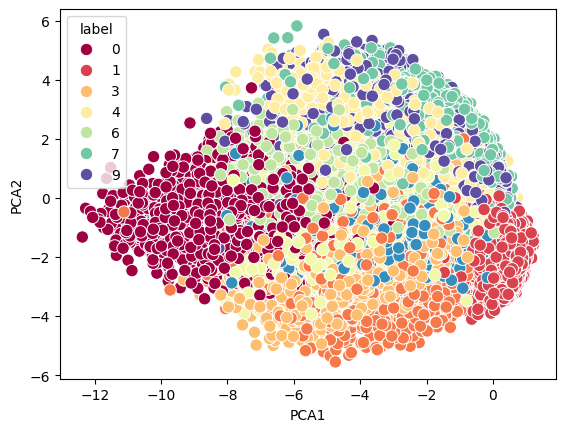

In [47]:
data_label=pd.concat([data,pd.DataFrame(y)],axis=1)# Concat along columns
sns.scatterplot(data=data_label,x='PCA1',y='PCA2',hue=y,s=80,palette='Spectral')